In [4]:
import json
import pandas as pd   
import seaborn as sns
# for plotting
import matplotlib.pyplot as plt 

# for learning algorithms
import sklearn

# for encoding categorical variables
import sklearn.preprocessing as pre

with open('data.json','r+') as json_file:
        house_data = json.load(json_file)

In [7]:
house_data

[{'environment': 'prod',
  'platform': 'desktop',
  'page_name': 'PropertyDetails',
  'area': 'Wexford Town',
  'county': 'Wexford',
  'longitude': -6.480456,
  'latitude': 52.331215,
  'seller_id': 5489,
  'seller_name': 'Keane Auctioneers',
  'seller_type': 'agent',
  'selling_type': 'private-treaty',
  'property_category': 'sale',
  'ad_id': '12146164',
  'property_title': 'No. 9 Woodfield, Clonard, Wexford Town, Co. Wexford',
  'published_date': '2020-11-16',
  'no_of_photos': 20,
  'advertising_type': 'standard',
  'currency': '€',
  'price_type': '',
  'price': 315000,
  'bathrooms': 3,
  'beds': 4,
  'facility': '',
  'open_viewing': 'no',
  'ber_classification': 'C3',
  'property_type': 'detached',
  'ad_ids': ''},
 None,
 {'environment': 'prod',
  'platform': 'desktop',
  'page_name': 'PropertyDetails',
  'area': 'Courtown',
  'county': 'Wexford',
  'longitude': -6.237561,
  'latitude': 52.646088,
  'seller_id': 6030,
  'seller_name': 'Kinsella Estates',
  'seller_type': 'agen

In [10]:
df = pd.json_normalize(house_data[0])

i=1;
while i < len(house_data): 
    df = df.append(house_data[i], ignore_index=True)
    i+=1

df = df.drop(['advertising_type', 'property_title','environment', 'platform', 'page_name', 'seller_type', 'price_type', 'open_viewing', 'ad_ids', \
             'ad_id', 'facility','seller_name', 'seller_id', 'property_category', 'selling_type', \
             'published_date', 'currency', 'no_of_photos'], axis=1)    
    
df.to_csv("house_data.csv")

# df = df.drop(['advertising_type', 'property_title','environment', 'platform', 'page_name', 'seller_type', 'price_type', 'open_viewing', 'ad_ids', \
#              'ad_id', 'facility', 'area', 'county','seller_name', 'seller_id', 'property_category', 'selling_type', \
#              'published_date', 'currency', 'no_of_photos'], axis=1)

In [9]:
df.head(5)

,longitude,latitude,price,bathrooms,beds,ber_classification,property_type,surface
0,-6.480456,52.331215,315000.0,3,4,C3,detached,NaN
1,-6.237561,52.646088,149000.0,1,2,G,semi-detached,68.63
2,-6.935998,52.404472,192000.0,2,4,C3,semi-detached,105.00
3,-6.944524,52.392443,65000.0,1,2,G,end-of-terrace,45.00
4,-6.454622,52.332995,130000.0,1,2,F,terraced,60.73


/Users/joconnor/.pyenv/versions/3.8.0/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


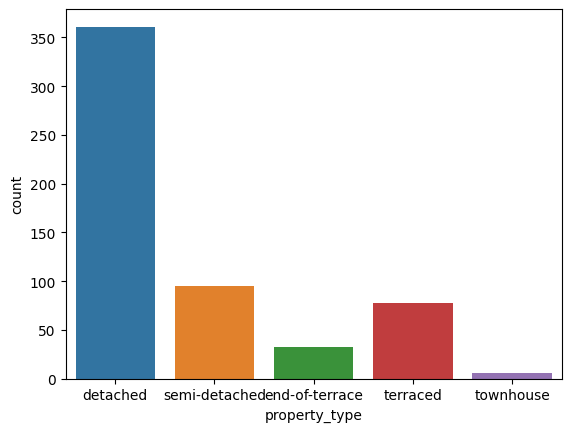

In [294]:
data = df.property_type.unique()
bar1 = sns.countplot(df['property_type'], x=data)
plt.show()

In [295]:
df.price = df.price.fillna(df.price.mean())

In [296]:
df.head(10)

,longitude,latitude,price,bathrooms,beds,ber_classification,property_type,surface
0,-6.480456,52.331215,315000.000000,3,4,C3,detached,NaN
1,-6.237561,52.646088,149000.000000,1,2,G,semi-detached,68.63
2,-6.935998,52.404472,192000.000000,2,4,C3,semi-detached,105.00
3,-6.944524,52.392443,65000.000000,1,2,G,end-of-terrace,45.00
4,-6.454622,52.332995,130000.000000,1,2,F,terraced,60.73
5,-6.340365,52.249322,185000.000000,2,3,D1,detached,NaN
6,-6.946246,52.331056,299950.000000,2,4,D1,detached,160.30
7,-6.946246,52.331056,299950.000000,2,4,D1,detached,160.30
8,-6.854983,52.378200,279306.164021,2,5,C2,detached,NaN
9,-6.793841,52.519084,375000.000000,2,3,E2,detached,170.00


In [297]:
# create model
lb = pre.LabelEncoder()

df["property_type"] = df["property_type"].astype("category")

# transform the roadSurface variable to values
df['property_type'] = lb.fit_transform(df.property_type.values)

le_name_mapping_property = dict(zip(lb.classes_, lb.transform(lb.classes_)))
print(le_name_mapping)

{'detached': 0, 'end-of-terrace': 1, 'semi-detached': 2, 'terraced': 3, 'townhouse': 4}


In [298]:
lb_2= pre.LabelEncoder()

df["ber_classification"] = df["ber_classification"].astype("str")

# transform the roadSurface variable to values
df['ber_classification'] = lb_2.fit_transform(df.ber_classification.values)

le_name_mapping_ber = dict(zip(lb_2.classes_, lb_2.transform(lb_2.classes_)))
print(le_name_mapping_ber)

{'A1': 0, 'A2': 1, 'A3': 2, 'B1': 3, 'B2': 4, 'B3': 5, 'C1': 6, 'C2': 7, 'C3': 8, 'D1': 9, 'D2': 10, 'E1': 11, 'E2': 12, 'Exempt': 13, 'F': 14, 'G': 15, 'nan': 16}


In [299]:
df_sqft = df.dropna()

In [300]:
df_sqft = df_sqft.drop(df.index[530])
df_sqft = df_sqft.drop(df.index[388])

In [301]:
df_sqft.max(), df_sqft.idxmax()

(longitude            -6.183958e+00
 latitude              5.279071e+01
 price                 1.750000e+06
 bathrooms             1.000000e+01
 beds                  1.000000e+01
 ber_classification    1.600000e+01
 property_type         4.000000e+00
 surface               6.099000e+02
 dtype: float64,
 longitude              92
 latitude              172
 price                 110
 bathrooms             111
 beds                   53
 ber_classification    110
 property_type         192
 surface               393
 dtype: int64)

In [302]:
inputs = df_sqft[[ 'latitude', 'longitude','surface', 'ber_classification', 'property_type']]
labels = df_sqft[['price']]
inputs.describe(), labels.describe()

(         latitude   longitude     surface  ber_classification  property_type
 count  390.000000  390.000000  390.000000          390.000000     390.000000
 mean    52.460682   -6.516767  162.981644            8.920513       0.787179
 std      0.169531    0.228516   89.725321            3.301685       1.159886
 min     52.157020   -6.976377   42.000000            0.000000       0.000000
 25%     52.330881   -6.646920   95.000000            7.000000       0.000000
 50%     52.452486   -6.475684  136.500000            8.000000       0.000000
 75%     52.633488   -6.312192  204.200000           10.000000       2.000000
 max     52.790707   -6.183958  609.900000           16.000000       4.000000,
               price
 count  3.900000e+02
 mean   2.924072e+05
 std    1.978358e+05
 min    5.000000e+04
 25%    1.712500e+05
 50%    2.450000e+05
 75%    3.490000e+05
 max    1.750000e+06)

In [303]:
labels["price"] = labels["price"].astype("int")

<ipython-input-303-1b7ba7be6356>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels["price"] = labels["price"].astype("int")


In [304]:
from sklearn.linear_model import LinearRegression

In [305]:
reg = LinearRegression()

In [306]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.1, random_state=2)

In [307]:
model = reg.fit(x_train, y_train)

In [308]:
model.score(x_test, y_test)

0.5853770691301067

In [309]:
import numpy as np 

x_pred = np.array([ 52.31819157559287, -6.5971814897148, 120, 15, 0])
x_pred = x_pred.reshape(-1, 5)
model.predict(x_pred)

array([[208544.33557006]])

In [326]:
ber_key_list = list(le_name_mapping_ber.keys()) 
ber_val_list = list(le_name_mapping_ber.values()) 

property_key_list = list(le_name_mapping_property.keys()) 
property_val_list = list(le_name_mapping_property.values()) 

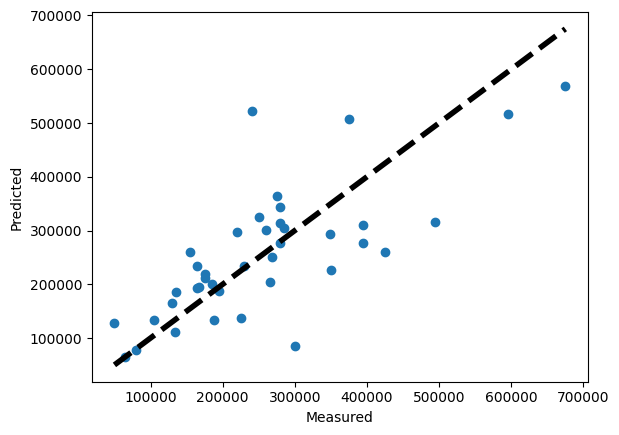

In [390]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(model, x_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [436]:
data = pd.DataFrame(columns=['prediction(%)', 'type', 'run'])

data = data.append(
    [{'run': 1, 'type': 'kNN, SMOTE, standardScalar, K=5','prediction(%)': 99.45},
    {'run': 2, 'type': 'kNN, minMaxScalar, K=5','prediction(%)': 91.4},
    {'run': 3, 'type': 'SVM, SMOTE, standardScalar, RBF, C=1','prediction(%)': 82.6},
    {'run': 4, 'type': 'SVM, minMaxScalar, RBF, C=1','prediction(%)': 82.3},
    {'run': 5, 'type': 'SVM, minMaxScalar, RBF, C=32','prediction(%)': 87.2}]
, ignore_index=True)

data

,prediction(%),type,run
0,99.45,"kNN, SMOTE, standardScalar, K=5",1
1,91.40,"kNN, minMaxScalar, K=5",2
2,82.60,"SVM, SMOTE, standardScalar, RBF, C=1",3
3,82.30,"SVM, minMaxScalar, RBF, C=1",4
4,87.20,"SVM, minMaxScalar, RBF, C=32",5


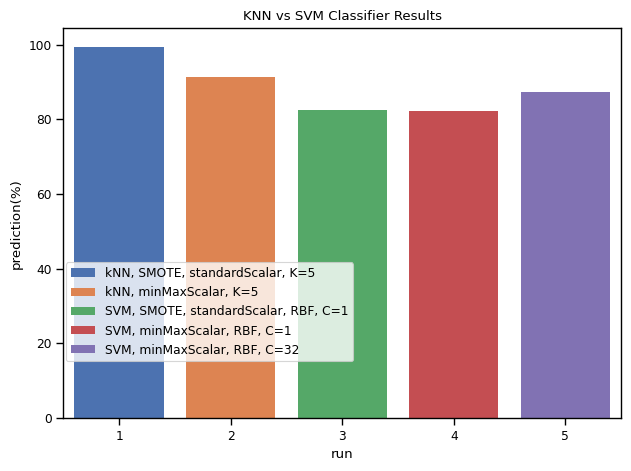

In [441]:
sns.barplot(x = 'run', y = 'prediction(%)', hue="type", data = data,
            palette = 'deep',             
            saturation = 2,
            dodge=False
            )

plt.legend(bbox_to_anchor=(0.52, 0.4),borderaxespad=0.01)
plt.title("KNN vs SVM Classifier Results")
plt.tight_layout()
plt.savefig("knn_v_svm_result.svg",
                    format='svg',dpi=300)

In [ ]:
data = pd.DataFrame(columns=['prediction(%)', 'type', 'run'])

data = data.append(
    [{'run': knn_best, 'type': 'kNN, SMOTE, standardScalar, K=5','prediction(%)': 99.45},
    {'run': 2, 'type': 'kNN, minMaxScalar, K=5','prediction(%)': 91.4},
    {'run': 3, 'type': 'SVM, SMOTE, standardScalar, RBF, C=1','prediction(%)': 82.6},
    {'run': 4, 'type': 'SVM, minMaxScalar, RBF, C=1','prediction(%)': 82.3},
    {'run': 5, 'type': 'SVM, minMaxScalar, RBF, C=32','prediction(%)': 87.2}]
, ignore_index=True)

data